In [15]:
from segway_control import *

import numpy as np
import scipy.integrate as sig
import scipy.linalg as spl
import cvxpy as cp

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [16]:
''' Параметры системы '''
param = Parameters()
A, B = continuous_system_coef(param)
eigA = np.linalg.eigvals(A)
eigA = eigA.astype(complex)
eigA

array([ 0.        +0.j,  0.52145782+0.j, -2.05987963+0.j, -7.502976  +0.j])

In [17]:
''' Время и начальные значения '''
t = np.linspace(0, 20, 401)
x0 = np.array([0.3, 0.5, 0.1, 0.2])
phi0 = np.array([0.3, 0.5, 0.3, 0.5])

In [18]:
''' Желаемые собственные числа и коэффициенты управления '''
pref_eigA = eigA.copy()
pref_eigA[0] = -2
pref_eigA[1] = -1.5
theta = get_control_akkerman(A, B, np.poly(pref_eigA))
pref_eigA, theta

(array([-2.        +0.j, -1.5       +0.j, -2.05987963+0.j, -7.502976  +0.j]),
 array([[-2873.69639459,    43.81344443, -1392.33193609,   148.63880682]]))

In [19]:
''' Непрерывная линейная система '''
lin_sol = sig.odeint(linear_odefun_no_obs, x0, t, args = (A, B, theta))
lin_u = lin_sol @ theta.T

In [20]:
''' Непрерывная нелинейная система '''
nonlin_sol = sig.odeint(nonlinear_odefun_no_obs, x0, t, args = (param, theta))
nonlin_u = nonlin_sol @ theta.T

c:\oleg-w570\seqway-control\.venv\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


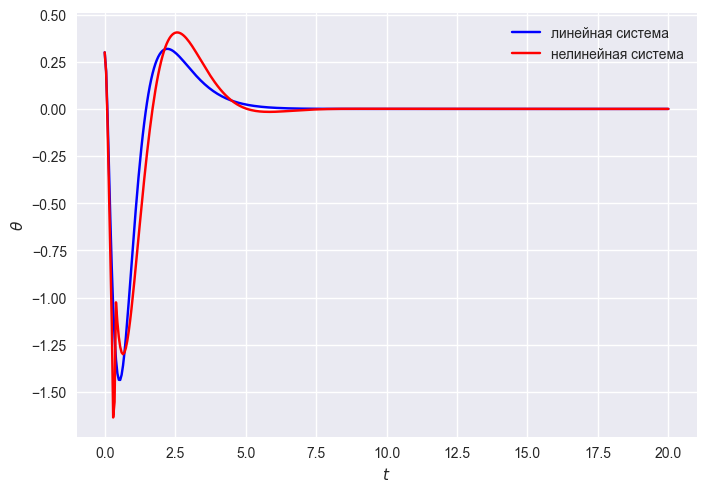

In [21]:
plt.plot(t, lin_sol[:, 0], label='линейная система', color='blue')
plt.plot(t, nonlin_sol[:, 0], label='нелинейная система', color='red')
plt.xlabel('$t$')
plt.ylabel('$\\theta$')
plt.legend()

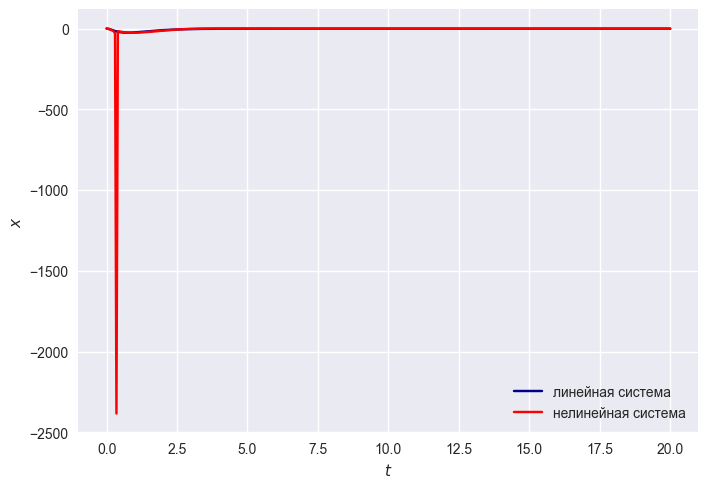

In [22]:
plt.plot(t, lin_sol[:, 1], label='линейная система', color='darkblue')
plt.plot(t, nonlin_sol[:, 1], label='нелинейная система', color='red')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()

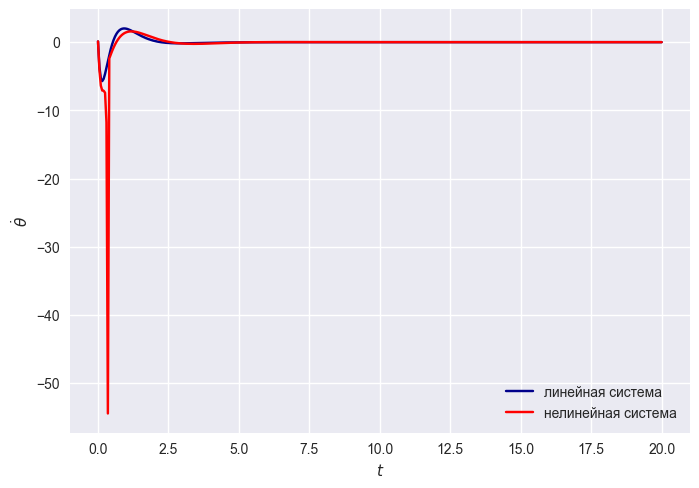

In [23]:
plt.plot(t, lin_sol[:, 2], label='линейная система', color='darkblue')
plt.plot(t, nonlin_sol[:, 2], label='нелинейная система', color='red')
plt.xlabel('$t$')
plt.ylabel('$\\dot{\\theta}$')
plt.legend()

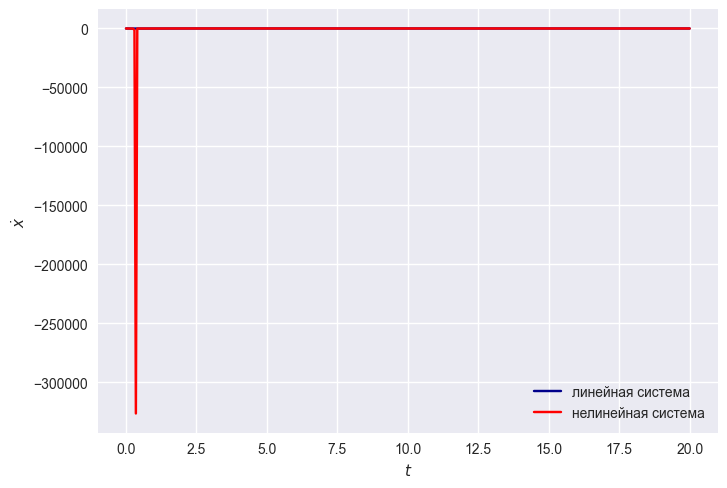

In [24]:
plt.plot(t, lin_sol[:, 3], label='линейная система', color='darkblue')
plt.plot(t, nonlin_sol[:, 3], label='нелинейная система', color='red')
plt.xlabel('$t$')
plt.ylabel('$\\dot{x}$')
plt.legend()